In [1]:
from pycaret.regression import *
from pycaret.datasets import get_data
import pandas as pd
df0 = pd.read_csv('C:/Users/Rui/OneDrive/桌面/data_xn/EURCHF_six_hourly_data.csv')
print(df0.shape)
df0.head()

(1460, 12)


,datetime,v,vw,o,c,h,l,t,n,hourly_vwap,hourly_liquidity,fd
0,2010-12-30 18:00:00,190.500000,1.247186,1.247205,1.247180,1.24732,1.24687,1.099688e+13,190.500000,237.586957,190.500000,423333.333333
1,2010-12-31 00:00:00,1209.333333,1.249861,1.249905,1.250247,1.25414,1.24645,2.242525e+13,1209.333333,1512.018488,1209.333333,157260.511487
2,2010-12-31 06:00:00,759.833333,1.250427,1.250340,1.249958,1.25490,1.24747,1.854426e+13,759.833333,950.230729,759.833333,102265.589951
3,2010-12-31 12:00:00,1.666667,1.251000,1.251200,1.251010,1.25120,1.25099,2.156333e+11,1.666667,12.510000,1.666667,7936.507937
4,2010-12-31 18:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,0.000000,NaN


In [2]:
(df0.isnull().sum() / len(df0)).sort_values(ascending=False)[:20]

vw                  0.250685
o                   0.250685
c                   0.250685
h                   0.250685
l                   0.250685
hourly_vwap         0.250685
fd                  0.250685
datetime            0.000000
v                   0.000000
t                   0.000000
n                   0.000000
hourly_liquidity    0.000000
dtype: float64

In [3]:
df = df0.dropna(subset=['hourly_vwap'])  # Replace 'column_name' with the name of the column

In [4]:
data = df.sample(frac=0.7, random_state=786)
data_unseen = df.drop(data.index)
 
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
 
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (766, 12)
Unseen Data For Predictions: (328, 12)


In [5]:
from pycaret.regression import *
setup(data = data, target = 'hourly_vwap', session_id=123) 

,Description,Value
0,Session id,123
1,Target,hourly_vwap
2,Target type,Regression
3,Original data shape,"(766, 12)"
4,Transformed data shape,"(766, 12)"
5,Transformed train set shape,"(536, 12)"
6,Transformed test set shape,"(230, 12)"
7,Numeric features,10
8,Categorical features,1
9,Preprocess,True


In [6]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,111.3995,64511.7362,235.3831,0.9970,0.0944,0.0396,0.2080
gbr,Gradient Boosting Regressor,174.0553,78793.6496,275.3321,0.9963,0.1293,0.0548,0.2170
lr,Linear Regression,203.0930,116167.4277,333.2263,0.9948,0.1893,0.0946,0.4440
lasso,Lasso Regression,203.4998,115782.8004,333.1703,0.9948,0.1865,0.0932,0.2990
ridge,Ridge Regression,206.8720,119063.7570,338.0847,0.9947,0.1820,0.0915,0.2710
lar,Least Angle Regression,202.9614,120261.8205,338.6297,0.9946,0.1950,0.0956,0.1670
rf,Random Forest Regressor,204.2645,132379.2127,350.0825,0.9940,0.1218,0.0551,0.2360
dt,Decision Tree Regressor,260.3392,191095.9573,432.2600,0.9911,0.1861,0.0628,0.1690
lightgbm,Light Gradient Boosting Machine,227.6293,220483.1148,417.8888,0.9908,0.1525,0.0710,0.2670
en,Elastic Net,330.2419,228492.4822,472.8598,0.9896,0.1640,0.0971,0.1710


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [7]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,65.0470,14938.0419,122.2213,0.9993,0.0186,0.0095
1,171.4558,200015.7001,447.2311,0.9899,0.2798,0.1194
2,98.5079,34999.0681,187.0804,0.9988,0.0443,0.0156
3,139.7736,107969.5861,328.5873,0.9945,0.0362,0.0152
4,150.0888,67458.1168,259.7270,0.9976,0.1366,0.0507
5,104.3653,39174.6140,197.9258,0.9986,0.0403,0.0212
6,132.6348,73575.7959,271.2486,0.9964,0.2300,0.1015
7,80.8155,20774.5941,144.1339,0.9985,0.0318,0.0128
8,70.6665,18187.6264,134.8615,0.9989,0.0932,0.0317


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,140.4026,68951.0568,262.5853,0.9969,0.0382,0.0214
1,242.3234,232476.0286,482.1577,0.9882,0.2618,0.1199
2,277.7434,489582.4476,699.7017,0.9832,0.0925,0.0391
3,243.0710,202645.8988,450.1621,0.9897,0.0517,0.0292
4,265.6300,173843.6420,416.9456,0.9938,0.2647,0.1416
5,185.4988,75811.1894,275.3383,0.9973,0.0711,0.0404
6,222.7959,137799.7808,371.2139,0.9933,0.2279,0.1147
7,173.3356,81013.1130,284.6280,0.9943,0.0675,0.0286
8,154.6575,60897.8440,246.7749,0.9962,0.1528,0.0703


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


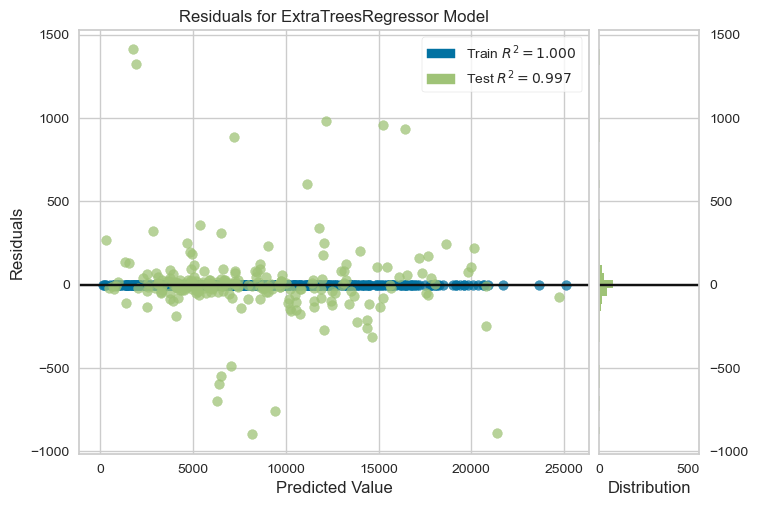

In [9]:
plot_model(et)

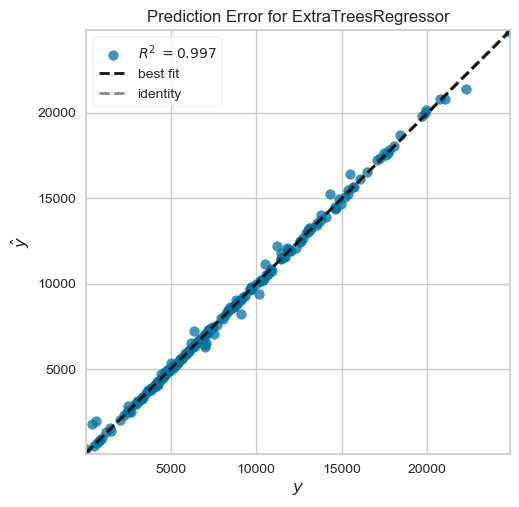

In [10]:
plot_model(et, plot = 'error')

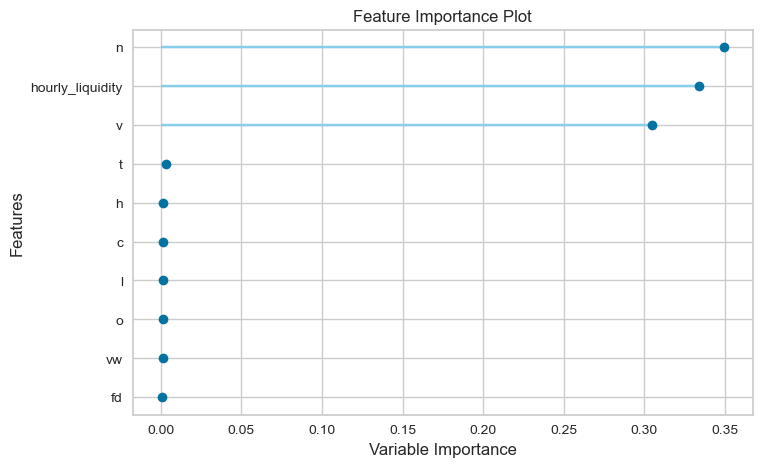

In [11]:
plot_model(tuned_et, plot='feature')

In [12]:
predict_model(et);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,112.9218,57910.6831,240.6464,0.9975,0.1729,0.0599


In [13]:
final_et = finalize_model(et)
print(final_et)

Pipeline(memory=FastMemory(location=C:\Users\Rui\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['v', 'vw', 'o', 'c', 'h', 'l', 't',
                                             'n', 'hourly_liquidity', 'fd'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['datetime'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['datetime'],
                                    transformer=LeaveOneOutEncoder(cols=['datetime'],
                                                                   handle_missing='return_nan',
                                                                   random_state=123))),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])
